MACHINE LEARNNING CLASSIFICATION: FINAL PROJECT 

For this project we are going to use a Dataset about F1, in which we want to predict with KNN algorithm who is going to win. 
We convert the column WINS into a 1-0 variable (1 win - 0 not win). 

First we have to import our dataset and also look for some analysis that allow us to understand better the data.

We perform some statistic measures and also we transform some of the variables to adapt them to the model.

In [1]:
#import libraries to manage data 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


The Dataset contains information about races in recen years, including informacion about points, position, and times in races, pit and laps.

In [3]:
Data_model = pd.read_excel("F1_stats.xlsx")
Data_model.head()

,resultId,raceId,driverId,Name,Code,constructorId,constructor,number,grid,positionOrder,...,fastestLapTime,fastestLapSpeed,statusId,time_pit,duration_pit,milliseconds_pit,lap,position_lap,time_lap,milliseconds_lap
0,1,18,1,hamilton,HAM,1,mclaren,22,1,1,...,1:27.452,218300,1,0.0,0,0,1,1,2:01.465,121465
1,2,18,2,heidfeld,HEI,2,bmw_sauber,3,5,2,...,1:27.739,217586,1,0.0,0,0,1,5,2:05.640,125640
2,3,18,3,rosberg,ROS,3,williams,7,7,3,...,1:28.090,216719,1,0.0,0,0,1,4,2:04.776,124776
3,4,18,4,alonso,ALO,4,renault,5,11,4,...,1:28.603,215464,1,0.0,0,0,1,9,2:10.476,130476
4,5,18,5,kovalainen,KOV,1,mclaren,23,3,5,...,1:27.418,218385,1,0.0,0,0,1,3,2:03.824,123824


In [5]:
Data_model.dtypes

resultId              int64
raceId                int64
driverId              int64
Name                 object
Code                 object
constructorId         int64
constructor          object
number                int64
grid                  int64
positionOrder         int64
points              float64
wins                  int64
laps                  int64
time                 object
milliseconds         object
fastestLap           object
rank                 object
fastestLapTime       object
fastestLapSpeed      object
statusId              int64
time_pit            float64
duration_pit         object
milliseconds_pit      int64
lap                   int64
position_lap          int64
time_lap             object
milliseconds_lap      int64
dtype: object

In [7]:
def convert_to_num (x):
    if pd.isnull(x):
        return None 
    try: 
        x = str(x).strip()
        if ':' in x:
            partes = x.split(':')
            if len(partes) == 2:
                minutos = int(partes[0])
                segundos = float(partes[1])
                return minutos * 60 + segundos
        else:
            return float(x)
    except:
        return None


In [9]:
col_model = ['time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'time_pit', 'duration_pit', 'time_lap']

for x in col_model: 
    Data_model[x] = Data_model[x].apply(convert_to_num)

Data_model[['resultId', 'raceId', 'driverId', 'constructorId']] = Data_model[['resultId', 'raceId', 'driverId', 'constructorId']].astype(object)
Data_model.dtypes

resultId             object
raceId               object
driverId             object
Name                 object
Code                 object
constructorId        object
constructor          object
number                int64
grid                  int64
positionOrder         int64
points              float64
wins                  int64
laps                  int64
time                float64
milliseconds        float64
fastestLap          float64
rank                float64
fastestLapTime      float64
fastestLapSpeed     float64
statusId              int64
time_pit            float64
duration_pit        float64
milliseconds_pit      int64
lap                   int64
position_lap          int64
time_lap            float64
milliseconds_lap      int64
dtype: object

In [11]:
Data_model.describe()

,number,grid,positionOrder,points,wins,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,time_pit,duration_pit,milliseconds_pit,lap,position_lap,time_lap,milliseconds_lap
count,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,4580.000000,5.123000e+03,8207.000000,8301.000000,8207.000000,8207.000000,10858.000000,10858.000000,10858.000000,1.085800e+04,10858.000000,10858.000000,10856.000000,1.085800e+04
mean,18.034445,10.858998,10.642936,3.569626,0.169645,53.737797,20438.356310,5.799899e+06,42.860972,10.513071,90.822228,204088.828317,8.741573,0.342576,14482.530436,3.871380e+04,1.567047,10.695064,113.773104,1.144338e+05
std,18.121907,6.186273,5.984142,5.983755,0.375337,17.197209,21034.338608,1.128486e+06,16.530330,6.020666,12.367193,21411.191517,16.098392,0.325247,14861.956242,2.139239e+05,5.461494,5.984070,95.421199,1.071127e+05
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.011000,5.260000e+02,1.000000,0.000000,55.404000,89540.000000,1.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,68.922000,6.892200e+04
25%,7.000000,6.000000,5.000000,0.000000,0.000000,51.000000,85.603750,5.312450e+06,33.000000,5.000000,80.796500,193278.500000,1.000000,0.000000,0.000000,0.000000e+00,1.000000,6.000000,94.890750,9.489275e+04
50%,14.000000,11.000000,11.000000,0.000000,0.000000,56.000000,14616.000000,5.625870e+06,46.000000,10.000000,90.269000,204847.000000,4.000000,0.555995,19097.000000,2.054700e+04,1.000000,11.000000,104.805000,1.048090e+05
75%,21.000000,16.000000,16.000000,6.000000,0.000000,66.000000,36998.250000,6.024954e+06,54.000000,16.000000,99.508000,217386.500000,11.000000,0.629178,26587.000000,2.724700e+04,1.000000,16.000000,118.358250,1.183620e+05
max,99.000000,24.000000,24.000000,50.000000,1.000000,87.000000,136431.000000,1.474314e+07,85.000000,24.000000,202.300000,257320.000000,141.000000,0.924016,58563.000000,3.037323e+06,71.000000,24.000000,2526.253000,3.702636e+06


In [13]:
Data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10858 entries, 0 to 10857
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   resultId          10858 non-null  object 
 1   raceId            10858 non-null  object 
 2   driverId          10858 non-null  object 
 3   Name              10858 non-null  object 
 4   Code              10858 non-null  object 
 5   constructorId     10858 non-null  object 
 6   constructor       10858 non-null  object 
 7   number            10858 non-null  int64  
 8   grid              10858 non-null  int64  
 9   positionOrder     10858 non-null  int64  
 10  points            10858 non-null  float64
 11  wins              10858 non-null  int64  
 12  laps              10858 non-null  int64  
 13  time              4580 non-null   float64
 14  milliseconds      5123 non-null   float64
 15  fastestLap        8207 non-null   float64
 16  rank              8301 non-null   float6

In [15]:
Data_model.groupby('constructor')['wins'].count().sort_values(ascending = False)

constructor
ferrari         1046
mclaren         1043
williams        1042
red_bull         761
sauber           686
mercedes         605
renault          534
toro_rosso       511
force_india      400
haas             365
jordan           302
minardi          293
toyota           264
alfa             207
bar              207
benetton         184
aston_martin     177
alpine           176
alphatauri       160
arrows           160
prost            148
jaguar           146
lotus_f1         145
bmw_sauber       136
hrt              109
caterham         108
marussia         105
honda            101
stewart           84
tyrrell           83
lotus_racing      75
racing_point      74
manor             74
virgin            73
super_aguri       66
rb                46
brawn             34
ligier            31
spyker            29
footwork          27
mf1               24
forti              9
spyker_mf1         8
Name: wins, dtype: int64

C:\Users\mateo\AppData\Local\Temp\ipykernel_10864\2386934990.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_model['fastestLapTime'], bins = 20)


<Axes: xlabel='fastestLapTime', ylabel='Density'>

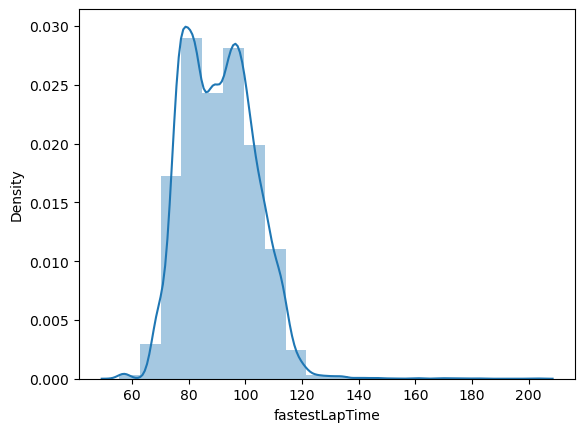

In [17]:
sns.distplot(Data_model['fastestLapTime'], bins = 20)

<Axes: xlabel='wins', ylabel='Count'>

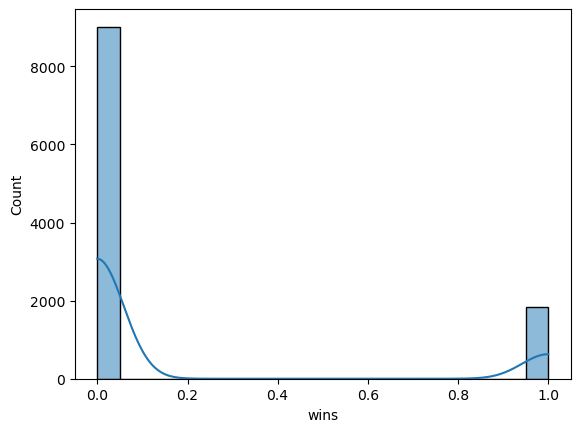

In [19]:
sns.histplot(Data_model['wins'], bins = 20, kde = True)

C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


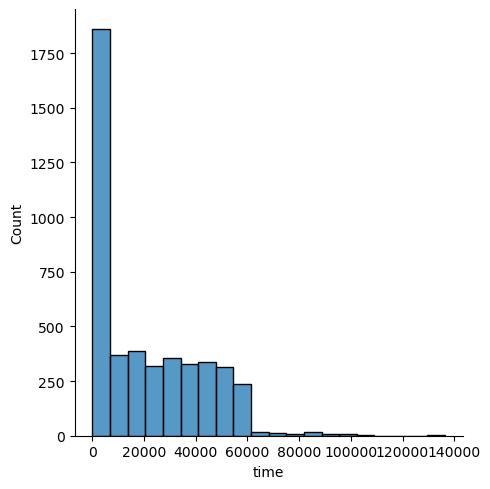

In [23]:
sns.displot(Data_model['time'], bins = 20)

C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


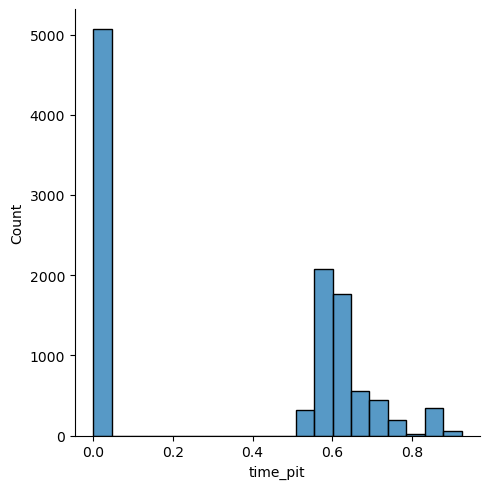

In [21]:
sns.displot(Data_model['time_pit'], bins = 20)

C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


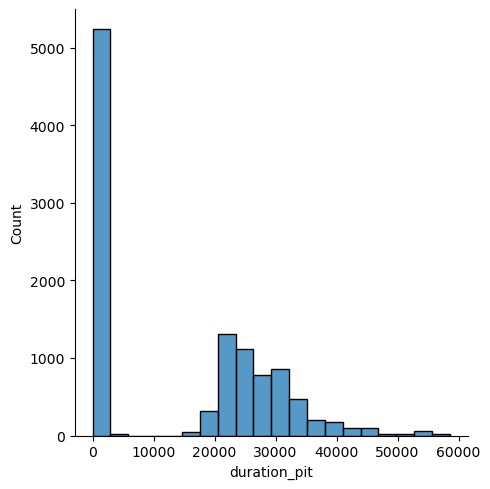

In [25]:
sns.displot(Data_model['duration_pit'], bins = 20)

C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


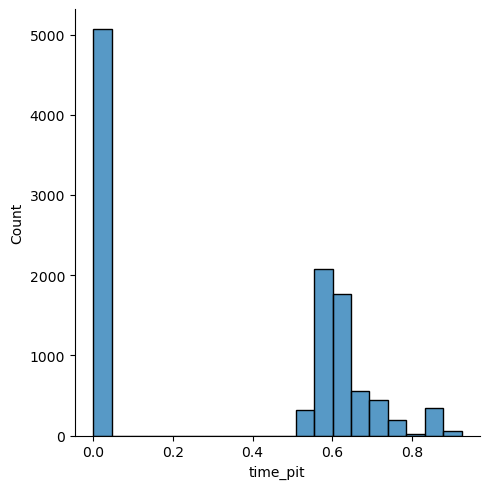

In [23]:
sns.displot(Data_model['time_pit'], bins = 20)

In [25]:
Data_model.isna().sum()

resultId               0
raceId                 0
driverId               0
Name                   0
Code                   0
constructorId          0
constructor            0
number                 0
grid                   0
positionOrder          0
points                 0
wins                   0
laps                   0
time                6278
milliseconds        5735
fastestLap          2651
rank                2557
fastestLapTime      2651
fastestLapSpeed     2651
statusId               0
time_pit               0
duration_pit           0
milliseconds_pit       0
lap                    0
position_lap           0
time_lap               2
milliseconds_lap       0
dtype: int64

In [31]:
Data_model[pd.isna(Data_model.fastestLapTime)]

,resultId,raceId,driverId,Name,Code,constructorId,constructor,number,grid,positionOrder,...,fastestLapTime,fastestLapSpeed,statusId,time_pit,duration_pit,milliseconds_pit,lap,position_lap,time_lap,milliseconds_lap
84,107,22,6,nakajima,NAK,3,williams,8,16,19,...,NaN,NaN,4,0.000000,0.000,0,1,19,151.878,151878
339,367,35,12,piquet_jr,PIQ,4,renault,6,11,19,...,NaN,NaN,3,0.000000,0.000,0,1,24,158.466,158466
340,368,35,14,coulthard,COU,9,red_bull,9,14,20,...,NaN,NaN,4,0.000000,0.000,0,1,1,116.343,116343
417,456,39,25,wurz,WUR,3,williams,17,18,22,...,NaN,NaN,4,0.000000,0.000,0,1,22,136.740,136740
439,478,40,24,liuzzi,LIU,5,toro_rosso,18,12,22,...,NaN,NaN,3,0.000000,0.000,0,1,13,95.137,95137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10542,26437,1128,822,bottas,BOT,15,sauber,77,17,13,...,NaN,NaN,12,0.628356,2358.026,2358026,1,15,2521.748,2521748
10543,26438,1128,840,stroll,STR,117,aston_martin,18,13,14,...,NaN,NaN,12,0.628356,2358.026,2358026,1,11,2502.648,2502648
10544,26439,1128,858,sargeant,SAR,3,williams,2,15,15,...,NaN,NaN,12,0.628356,2358.026,2358026,1,14,2516.858,2516858
10545,26440,1128,855,zhou,ZHO,15,sauber,24,18,16,...,NaN,NaN,12,0.628356,2358.026,2358026,1,16,2526.253,2526253


In [33]:
columns_isna = ['time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'time_pit', 'duration_pit', 'time_lap']

for x in columns_isna:
    Data_model[x] = pd.to_numeric(Data_model[x], errors='coerce')

In [35]:
for x in columns_isna:
    Data_model[x] = Data_model.groupby('driverId')[x].transform(lambda x: x.fillna(x.mean()))


In [37]:
for x in columns_isna:
    Data_model[x] = Data_model[x].fillna(Data_model[x].mean())

In [39]:
Data_model[pd.isna(Data_model.time_lap)]

,resultId,raceId,driverId,Name,Code,constructorId,constructor,number,grid,positionOrder,...,fastestLapTime,fastestLapSpeed,statusId,time_pit,duration_pit,milliseconds_pit,lap,position_lap,time_lap,milliseconds_lap


In [41]:
Data_model.isna().sum()

resultId            0
raceId              0
driverId            0
Name                0
Code                0
constructorId       0
constructor         0
number              0
grid                0
positionOrder       0
points              0
wins                0
laps                0
time                0
milliseconds        0
fastestLap          0
rank                0
fastestLapTime      0
fastestLapSpeed     0
statusId            0
time_pit            0
duration_pit        0
milliseconds_pit    0
lap                 0
position_lap        0
time_lap            0
milliseconds_lap    0
dtype: int64

In [43]:
def outlier(x): 
    q1 = np.percentile(x, 0.25)
    q3 = np.percentile(x, 0.75)
    IQR = q3 - q1
    upper_bound = q1 + 1.5 * IQR
    lower_bound = q3 - 1.5 * IQR
    print("Lower bound: ", lower_bound, "Upper Bound: ",  upper_bound)





In [45]:
Num_cat = ['wins', 'points', 'laps', 'time', 'milliseconds', 'fastestLap', 'fastestLapSpeed', 'fastestLapTime', 'time_pit' , 'milliseconds_pit', 'duration_pit', 'position_lap', 'milliseconds_lap', 'time_lap']

for x in Num_cat:
    print("For: ",x)
    outlier(Data_model[x])
    


For:  wins
Lower bound:  0.0 Upper Bound:  0.0
For:  points
Lower bound:  0.0 Upper Bound:  0.0
For:  laps
Lower bound:  1.0 Upper Bound:  1.0
For:  time
Lower bound:  -11.602116249999998 Upper Bound:  37.44803875
For:  milliseconds
Lower bound:  -1897003.6287500001 Upper Bound:  6586480.56625
For:  fastestLap
Lower bound:  1.5 Upper Bound:  3.5
For:  fastestLapSpeed
Lower bound:  130797.08625000002 Upper Bound:  154918.06125
For:  fastestLapTime
Lower bound:  66.56319124999999 Upper Bound:  69.10978625000001
For:  time_pit
Lower bound:  0.0 Upper Bound:  0.0
For:  milliseconds_pit
Lower bound:  0.0 Upper Bound:  0.0
For:  duration_pit
Lower bound:  0.0 Upper Bound:  0.0
For:  position_lap
Lower bound:  1.0 Upper Bound:  1.0
For:  milliseconds_lap
Lower bound:  72031.275 Upper Bound:  79446.11499999999
For:  time_lap
Lower bound:  72.031275 Upper Bound:  79.44611499999999


<Axes: >

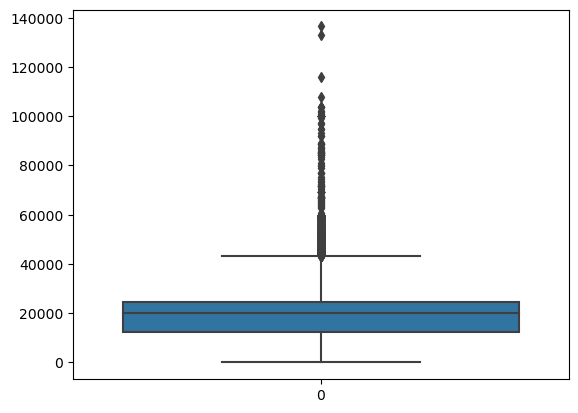

In [47]:
sns.boxplot(Data_model['time'])

<Axes: >

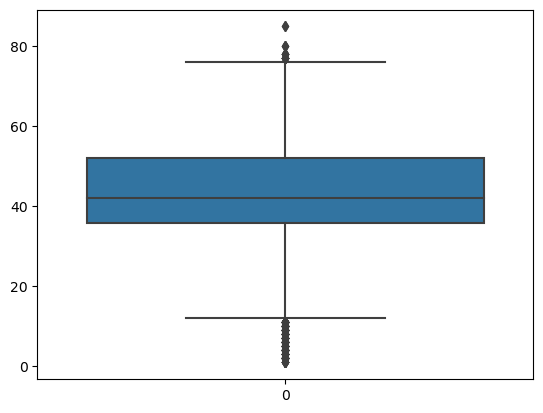

In [49]:
sns.boxplot(Data_model['fastestLap'])

<Axes: >

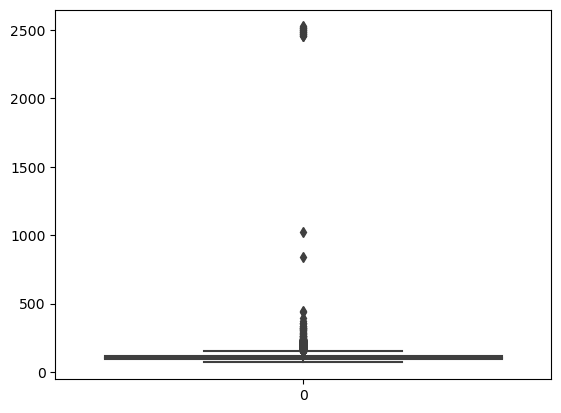

In [51]:
sns.boxplot(Data_model['time_lap'])

<Axes: >

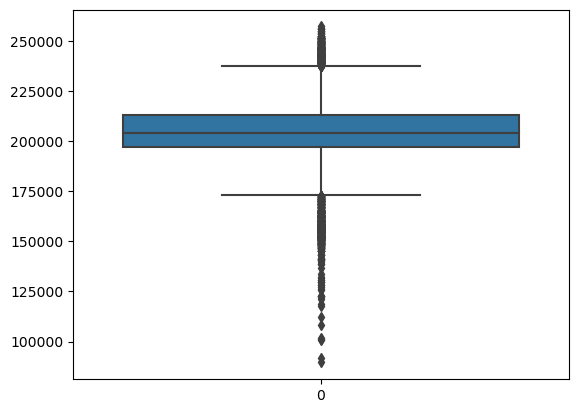

In [53]:
sns.boxplot(Data_model['fastestLapSpeed'])

<Axes: >

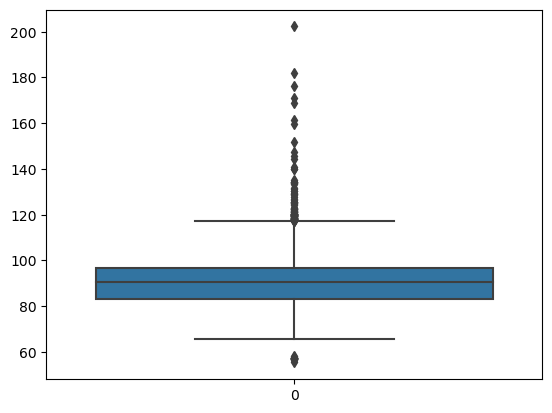

In [55]:
sns.boxplot(Data_model['fastestLapTime'])

In [83]:
Data_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 7292 to 10605
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   resultId          116 non-null    object 
 1   raceId            116 non-null    object 
 2   driverId          116 non-null    object 
 3   Name              116 non-null    object 
 4   Code              116 non-null    object 
 5   constructorId     116 non-null    object 
 6   constructor       116 non-null    object 
 7   number            116 non-null    int64  
 8   grid              116 non-null    int64  
 9   positionOrder     116 non-null    int64  
 10  points            116 non-null    float64
 11  wins              116 non-null    int64  
 12  laps              116 non-null    int64  
 13  time              116 non-null    float64
 14  milliseconds      116 non-null    float64
 15  fastestLap        116 non-null    float64
 16  rank              116 non-null    float64
 1

To improve our model, we need to transform our data, with the goal to work with them in a similar range of values.

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Data_model[['points', 'laps', 'time', 'milliseconds', 'fastestLap', 'fastestLapSpeed', 'fastestLapTime', 'time_pit' , 'milliseconds_pit', 'duration_pit', 'position_lap', 'milliseconds_lap', 'time_lap']] = scaler.fit_transform(Data_model[['points', 'laps', 'time', 'milliseconds', 'fastestLap', 'fastestLapSpeed', 'fastestLapTime', 'time_pit' , 'milliseconds_pit', 'duration_pit', 'position_lap', 'milliseconds_lap', 'time_lap']]) 
    
    

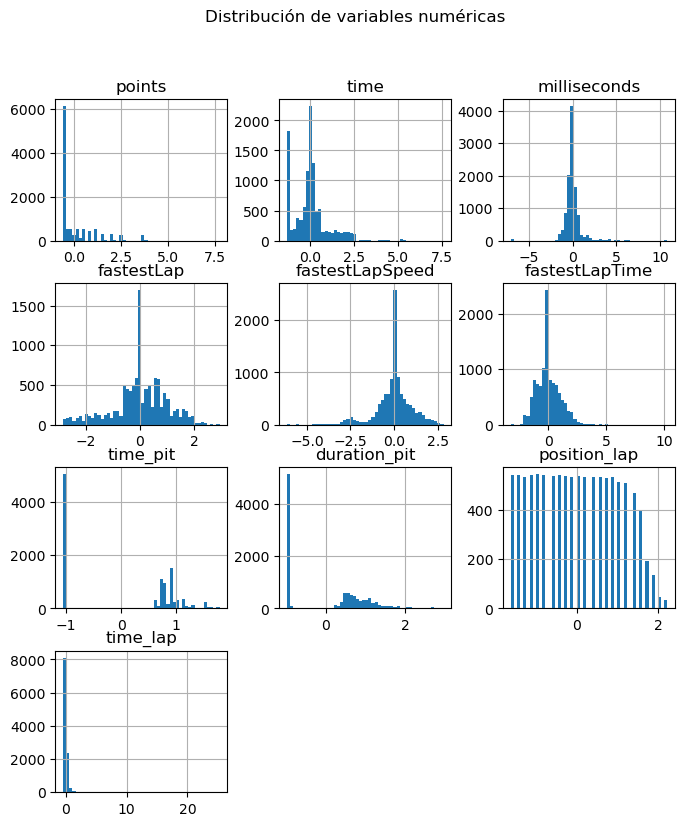

In [63]:
Data_model[['points', 'time', 'milliseconds', 'fastestLap', 'fastestLapSpeed', 'fastestLapTime', 'time_pit' , 'duration_pit', 'position_lap', 'time_lap']].hist(bins = 50, figsize=(8, 9))
plt.xlim(0,10)
plt.suptitle("Distribución de variables numéricas")
plt.show()

<Axes: xlabel='time', ylabel='wins'>

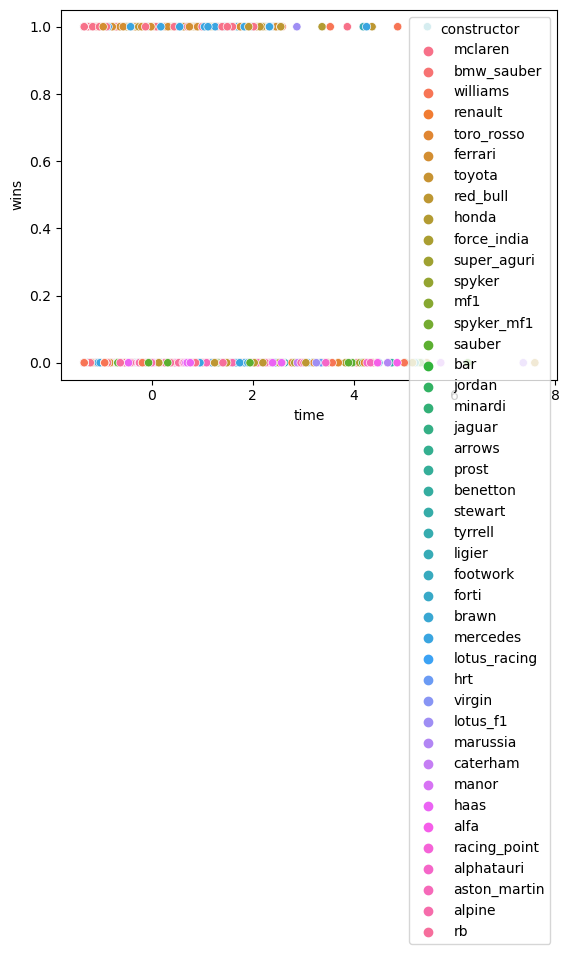

In [67]:
sns.scatterplot(data=Data_model, x='time', y='wins', hue = 'constructor')

<Axes: xlabel='duration_pit', ylabel='wins'>

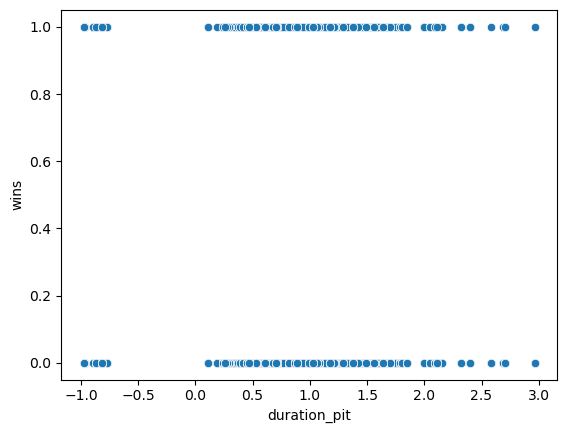

In [69]:
sns.scatterplot(data=Data_model, x='duration_pit', y='wins')

<Axes: xlabel='fastestLapSpeed', ylabel='wins'>

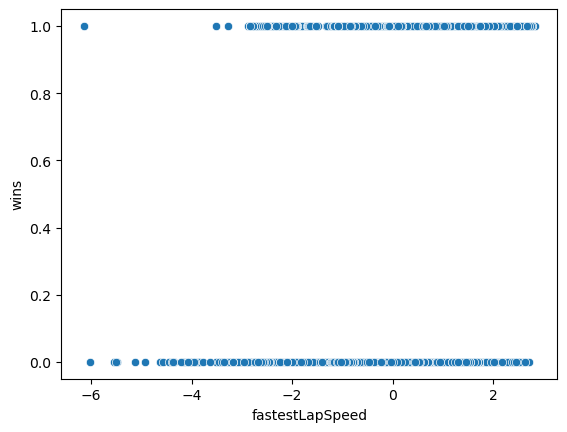

In [71]:
sns.scatterplot(data=Data_model, x='fastestLapSpeed', y='wins')

After we transform our data, we can import the libraries for the model, Sklearn provide the tools to make that KNN MODEL.

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

Y = Data_model['wins'] 
X = Data_model[['points', 'wins', 'points', 'laps', 'time', 'milliseconds', 'fastestLap', 'fastestLapSpeed', 'fastestLapTime', 'time_pit' , 'milliseconds_pit', 'duration_pit', 'position_lap', 'milliseconds_lap', 'time_lap']]

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=123)

In [77]:
knn_model = KNeighborsClassifier(n_neighbors = 3)

In [79]:
knn_model.fit(X_train, Y_train.values.ravel())

KNeighborsClassifier(n_neighbors=3)

In [81]:
predict = knn_model.predict(X_test)

In [113]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    return results_pos

In [115]:
evaluate_metrics(Y_test, predict)

{'accuracy': 0.9231123388581952}

Our model has a accuracy of 92%, but with GridSearch we can find the best parameter for our model, so we are going to use it to find what is the best parameter for our model.

In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)

print("Mejor K:", grid.best_params_['n_neighbors'])

Mejor K: 1


Accuracy: 0.9714548802946593
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1776
           1       0.97      0.87      0.92       396

    accuracy                           0.97      2172
   macro avg       0.97      0.93      0.95      2172
weighted avg       0.97      0.97      0.97      2172



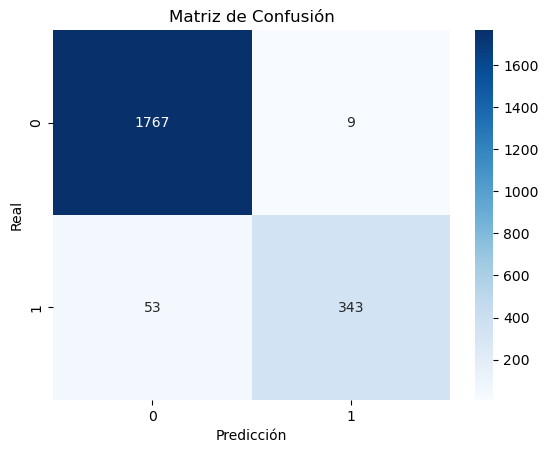

In [91]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred = grid.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

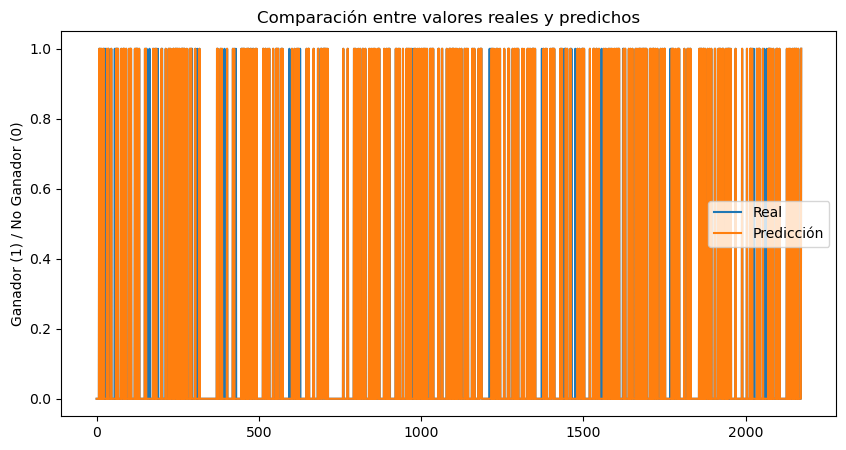

In [93]:
df_comparacion = pd.DataFrame({'Real': Y_test.reset_index(drop=True), 
                               'Predicción': pd.Series(y_pred)})

df_comparacion.plot(figsize=(10, 5))
plt.title("Comparación entre valores reales y predichos")
plt.ylabel("Ganador (1) / No Ganador (0)")
plt.show()

So what are our final conclusions: 

1. With parameter K = 1, we improve the model accuracy to 97%, also we have a good % of Recall and F-1 score, this means that the model can identify very well wins are those who dont win.
2. The graph shows how the model made few errors, that error are group in the minority class (winner)
3. We can improve the model, using techniques as balancing classes, we can improve the sensibility for minority class.